In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_excel('data/Wine.xlsx')
df.head()
# assign the last column to a variable
y = df.iloc[:, -1].values
# take off the last column
df = df.iloc[:, 1:]
columns = df.columns



In [6]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load the wine dataset from sklearn
X, y = load_wine(return_X_y=True, as_frame=True)
labels = X.columns
# print sample size and number of features
print(f"Sample size: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
# print the number of classes
print(f"Number of classes: {len(np.unique(y))}")
# print the number of samples per class
print(f"Number of samples per class: {np.bincount(y)}")
# print number of missing values
print(f"Number of missing values: {X.isnull().sum().sum()}")
X.head()
# X.info()
# X.describe()

Sample size: 178
Number of features: 13
Number of classes: 3
Number of samples per class: [59 71 48]
Number of missing values: 0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # create a StandardScaler object
X_std = scaler.fit_transform(X) # standardize the data
# X_std = pd.DataFrame(X_std, columns=X.columns) # convert the array to a DataFrame
# X_std.head()


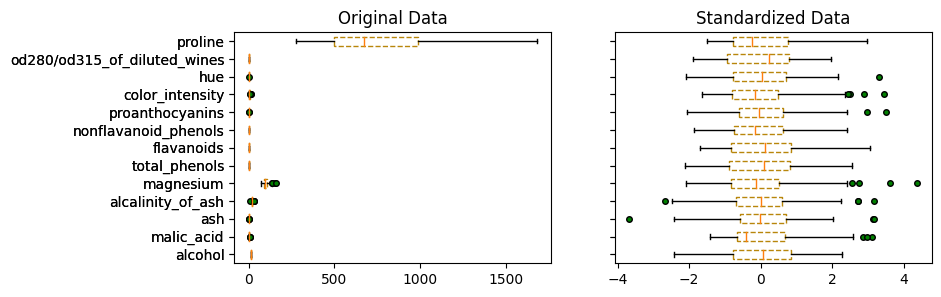

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3), sharey = True)
boxprops = dict(linestyle = '--', linewidth = 1, color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green', 
    markersize = 4, linestyle = 'none') 

# two boxplots share the same y-axis
ax[0].boxplot(X, boxprops = boxprops, flierprops = flierprops, \
    labels = labels, vert = False)
ax[0].set_title('Original Data')

ax[1].boxplot(X_std, boxprops = boxprops, flierprops = flierprops, \
    labels = labels, vert = False)
ax[1].set_title('Standardized Data')
plt.show()

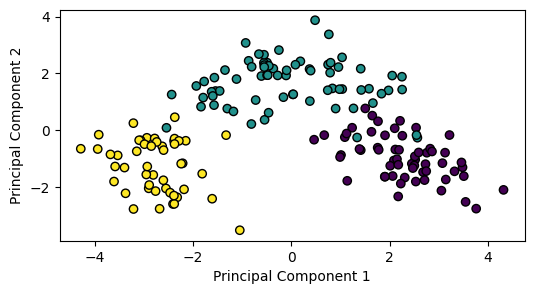

In [18]:
# PCA
from sklearn.decomposition import PCA

pca = PCA()
# pac = pca.fit(X)
# Z = pca.transform(X)
pca = pca.fit(X_std)
Z = pca.transform(X_std)
# X_pca = pca.fit_transform(X_std)
eigenvalues = pca.explained_variance_
Z.shape
# draw a scater plot of the first two principal components
plt.figure(figsize=(6, 3))
plt.scatter(Z[:, 0], Z[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# plt.colorbar()
plt.show()